<a href="https://colab.research.google.com/github/larissavvsous/lab_cd/blob/main/artigo_lab_cd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import pandas as pd # manipulação e análise de dados
import matplotlib.pyplot as plt # visualização de dados
import plotly.express as px # gráficos interativos
import numpy as np # computação científica, funções matemáticas
import plotly.graph_objs as go # semelhante ao plotly express, gráficos interativos personalizados
import scipy.stats as stats # estatísticas

# Leitura da base de dados brutos

In [2]:
dados_avc = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
dados_avc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Pré processamento
### Traduzindo o nome das colunas

In [3]:
dados_avc = dados_avc.rename(columns={'gender':'genero','age':'idade','hypertension':'hipertensao','heart_disease':'doenca_cardiaca','ever_married' : 'estado_civil','work_type':'tipo_trabalho','Residence_type':'tipo_residencia','avg_glucose_level':'nivel_medio_glicose','bmi':'IMC', 'smoking_status':'condicao_fumante','stroke':'AVC'})

### Traduzindo os labels de cada coluna categórica

In [4]:
dados_avc["genero"] = dados_avc["genero"].map({"Male": "Masculino", "Female": "Feminino", "Other": "Outro"})
dados_avc["hipertensao"] = dados_avc["hipertensao"].map({0: "Não", 1: "Sim"})
dados_avc["AVC"] = dados_avc["AVC"].map({0: "Não", 1: "Sim"})
dados_avc["doenca_cardiaca"] = dados_avc["doenca_cardiaca"].map({0: "Não", 1: "Sim"})
dados_avc["estado_civil"] = dados_avc["estado_civil"].map({"Yes": "Sim", "No": "Não"})
dados_avc["tipo_trabalho"] = dados_avc["tipo_trabalho"].map({"children": "Criança", "Govt_job":"Trabalho governo", "Never_worked":"Nunca trabalhou","Private":"Privado", "Self-employed":"Autônomo"})
dados_avc["tipo_residencia"] = dados_avc["tipo_residencia"].map({"Urban": "Urbano", "Rural": "Rural"})
dados_avc["condicao_fumante"] = dados_avc["condicao_fumante"].map({"never smoked": "Nunca fumou", "formerly smoked": "Fumava antes", "smokes": "Fuma", "Unknown": "Desconhecido"})

### Verificando idades < 1

In [5]:
dados_avc[dados_avc['idade'] < 1].head()

,id,genero,idade,hipertensao,doenca_cardiaca,estado_civil,tipo_trabalho,tipo_residencia,nivel_medio_glicose,IMC,condicao_fumante,AVC
363,7559,Feminino,0.64,Não,Não,Não,Criança,Urbano,83.82,24.9,Desconhecido,Não
376,22706,Feminino,0.88,Não,Não,Não,Criança,Rural,88.11,15.5,Desconhecido,Não
564,61511,Feminino,0.32,Não,Não,Não,Criança,Rural,73.71,16.2,Desconhecido,Não
982,54747,Masculino,0.88,Não,Não,Não,Criança,Rural,157.57,19.2,Desconhecido,Não
996,53279,Masculino,0.24,Não,Não,Não,Criança,Rural,118.87,16.3,Desconhecido,Não


#### Aqui vemos que idades menores que 1, são bebês (criança), que justamente são aquelas que a condição de fumante é desconhecida.

### Colocando "idade" em faixa etária

In [6]:
# Menor de 1 ano, 1 a 4 anos, 5 a 9 anos, 10 a 14 anos, 15 a 19 anos, 20 a 29 anos, 30 a 39 anos, 40 a 49 anos, 50 a 59 anos, 60 a 69 anos, 70 a 79 anos, Mais de 80 anos
faixas_etarias = [0, 1, 4, 9, 14, 19, 29, 39, 49, 59, 69, 79, 150]
rotulos_faixas_etarias = ['Menor de 1 ano', '1 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos',
                         '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos',
                         '70 a 79 anos', 'Mais de 80 anos']

dados_avc['faixa_etaria'] = pd.cut(dados_avc['idade'], bins=faixas_etarias, labels=rotulos_faixas_etarias)

dados_avc[['idade', 'faixa_etaria']]

,idade,faixa_etaria
0,67.0,60 a 69 anos
1,61.0,60 a 69 anos
2,80.0,Mais de 80 anos
3,49.0,40 a 49 anos
4,79.0,70 a 79 anos
...,...,...
5105,80.0,Mais de 80 anos
5106,81.0,Mais de 80 anos
5107,35.0,30 a 39 anos
5108,51.0,50 a 59 anos


### Colocando nível médio de glicose em intervalos

In [7]:
# usaremos lá na análise descritiva
gli_int = [55.12, 70, 100, 125, 271.74]
rotulos_gli_int = ['55,12 - 69,99', '70 - 99,99', '100 - 124,99', '125 - 271,74']

dados_avc['glicose_intervalos'] = pd.cut(dados_avc['nivel_medio_glicose'], bins=gli_int, labels=rotulos_gli_int)

dados_avc[['nivel_medio_glicose', 'glicose_intervalos']]


,nivel_medio_glicose,glicose_intervalos
0,228.69,"125 - 271,74"
1,202.21,"125 - 271,74"
2,105.92,"100 - 124,99"
3,171.23,"125 - 271,74"
4,174.12,"125 - 271,74"
...,...,...
5105,83.75,"70 - 99,99"
5106,125.20,"125 - 271,74"
5107,82.99,"70 - 99,99"
5108,166.29,"125 - 271,74"


### Mostrando e excluindo valores faltantes

In [8]:
dados_avc.isnull().sum()

id                       0
genero                   0
idade                    0
hipertensao              0
doenca_cardiaca          0
estado_civil             0
tipo_trabalho            0
tipo_residencia          0
nivel_medio_glicose      0
IMC                    201
condicao_fumante         0
AVC                      0
faixa_etaria             0
glicose_intervalos       1
dtype: int64

# Visualização dos dados tratados

In [9]:
dados_avc_att = dados_avc.dropna()
dados_avc_att

,id,genero,idade,hipertensao,doenca_cardiaca,estado_civil,tipo_trabalho,tipo_residencia,nivel_medio_glicose,IMC,condicao_fumante,AVC,faixa_etaria,glicose_intervalos
0,9046,Masculino,67.0,Não,Sim,Sim,Privado,Urbano,228.69,36.6,Fumava antes,Sim,60 a 69 anos,"125 - 271,74"
2,31112,Masculino,80.0,Não,Sim,Sim,Privado,Rural,105.92,32.5,Nunca fumou,Sim,Mais de 80 anos,"100 - 124,99"
3,60182,Feminino,49.0,Não,Não,Sim,Privado,Urbano,171.23,34.4,Fuma,Sim,40 a 49 anos,"125 - 271,74"
4,1665,Feminino,79.0,Sim,Não,Sim,Autônomo,Rural,174.12,24.0,Nunca fumou,Sim,70 a 79 anos,"125 - 271,74"
5,56669,Masculino,81.0,Não,Não,Sim,Privado,Urbano,186.21,29.0,Fumava antes,Sim,Mais de 80 anos,"125 - 271,74"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Feminino,13.0,Não,Não,Não,Criança,Rural,103.08,18.6,Desconhecido,Não,10 a 14 anos,"100 - 124,99"
5106,44873,Feminino,81.0,Não,Não,Sim,Autônomo,Urbano,125.20,40.0,Nunca fumou,Não,Mais de 80 anos,"125 - 271,74"
5107,19723,Feminino,35.0,Não,Não,Sim,Autônomo,Rural,82.99,30.6,Nunca fumou,Não,30 a 39 anos,"70 - 99,99"
5108,37544,Masculino,51.0,Não,Não,Sim,Privado,Rural,166.29,25.6,Fumava antes,Não,50 a 59 anos,"125 - 271,74"


# Análise descritiva (Crianças de 0 a 9 anos)
## Variáveis quantitativas discretas e contínuas

In [10]:
dados_avc_att = dados_avc

criancas = dados_avc[dados_avc['faixa_etaria'].isin(['Menor de 1 ano', '1 a 4 anos', '5 a 9 anos'])]
criancas.describe()

,id,idade,nivel_medio_glicose,IMC
count,472.000000,472.000000,472.000000,459.000000
mean,35604.118644,4.275424,93.519725,18.869935
std,21058.902929,2.758018,25.485075,3.548062
min,172.000000,0.080000,55.350000,10.300000
25%,16383.750000,1.880000,76.217500,16.700000
50%,35095.500000,4.000000,89.260000,18.300000
75%,53928.750000,7.000000,107.562500,20.100000
max,72940.000000,9.000000,206.250000,35.000000


In [11]:
quantidade_criancas = len(criancas)
print("Quantidade de crianças de 0 a 9 anos:", quantidade_criancas)

Quantidade de crianças de 0 a 9 anos: 472


## Variáveis qualitativas nominais

In [12]:
var_qual_c = ['genero', 'hipertensao', 'doenca_cardiaca', 'estado_civil', 'tipo_trabalho', 'tipo_residencia', 'condicao_fumante', 'AVC']

print("Sobre as Crianças:\n")
for var in var_qual_c:
    print('\n' + var.upper() + '\n')
    valores_formatados_c = round(criancas[var].value_counts(normalize=True, dropna=False)*100, 2)
    print(valores_formatados_c.apply(lambda x: '{0:.2f}%'.format(x)))

Sobre as Crianças:


GENERO

Masculino    53.18%
Feminino     46.82%
Name: genero, dtype: object

HIPERTENSAO

Não    100.00%
Name: hipertensao, dtype: object

DOENCA_CARDIACA

Não    99.79%
Sim     0.21%
Name: doenca_cardiaca, dtype: object

ESTADO_CIVIL

Não    100.00%
Name: estado_civil, dtype: object

TIPO_TRABALHO

Criança     99.58%
Privado      0.21%
Autônomo     0.21%
Name: tipo_trabalho, dtype: object

TIPO_RESIDENCIA

Urbano    52.33%
Rural     47.67%
Name: tipo_residencia, dtype: object

CONDICAO_FUMANTE

Desconhecido    100.00%
Name: condicao_fumante, dtype: object

AVC

Não    99.79%
Sim     0.21%
Name: AVC, dtype: object


# Gráficos
## Histogramas

In [13]:
gec = px.histogram(criancas, x='genero', color_discrete_sequence=px.colors.qualitative.Pastel,
                  labels={'genero':'Gênero'}, title='Gênero das crianças')
gec.show()
print('\n')

hic = px.histogram(criancas, x='hipertensao', color_discrete_sequence=px.colors.qualitative.Pastel,
                  labels={'hipertensao':'Hipertensão'}, title='Hipertensão das crianças')
hic.show()
print('\n')

dcc = px.histogram(criancas, x='doenca_cardiaca', color_discrete_sequence=px.colors.qualitative.Pastel,
                  labels={'doenca_cardiaca':'Doença Cardíaca'}, title='Doença Cardíaca das crianças')
dcc.show()
print('\n')

trc = px.histogram(criancas, x='tipo_residencia', color_discrete_sequence=px.colors.qualitative.Pastel,
                  labels={'tipo_residencia':'Tipo de Residência'}, title='Tipo de residência das crianças')
trc.show()
print('\n')

avcc = px.histogram(criancas, x='AVC', color_discrete_sequence=px.colors.qualitative.Pastel,
                   labels={'AVC':'AVC'}, title='Presença de AVC nas crianças')
avcc.show()


In [14]:
crian_idade = criancas['idade']
hist = go.Histogram(x=crian_idade, nbinsx=20, marker=dict(color='#66c5cc'))
mu, std = stats.norm.fit(crian_idade)
xmin, xmax = min(crian_idade), max(crian_idade)
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, loc=mu, scale=std) * len(crian_idade) * (xmax-xmin)/20
curve = go.Scatter(x=x, y=y, mode='lines', line=dict(color='#f6ce71'))
fig = go.Figure(data=[hist, curve], layout=go.Layout(title='Histograma de idade das crianças'))
fig.show()

In [15]:
# Gráfico de barras para explorar a presença de AVC por gênero
pagc = px.histogram(criancas, x='genero', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'genero':'Gênero', 'AVC':'Presença de AVC'})
pagc.update_layout(title='Presença de AVC por Gênero em crianças')
pagc.show()

# Gráfico de barras para explorar a presença de AVC por faixa etária
pafec = px.histogram(criancas, x='faixa_etaria', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'faixa_etaria':'Faixa Etária', 'AVC':'Presença de AVC'})
pafec.update_layout(title='Presença de AVC por Faixa Etária em crianças')
pafec.show()

# Gráfico de barras para explorar a presença de AVC em crianças com hipertensão
pachc = px.histogram(criancas, x='hipertensao', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'hipertensao':'Hipertensão', 'AVC':'Presença de AVC'})
pachc.update_layout(title='Presença de AVC em Crianças com Hipertensão')
pachc.show()

# Gráfico de barras para explorar a presença de AVC em crianças com doença cardíaca
pacdc = px.histogram(criancas, x='doenca_cardiaca', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'doenca_cardiaca':'Doença Cardíaca', 'AVC':'Presença de AVC'})
pacdc.update_layout(title='Presença de AVC em Crianças com Doença Cardíaca')
pacdc.show()

# Gráfico de barras para explorar o tipo de residência em crianças com AVC
trca = px.histogram(criancas, x='tipo_residencia', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'tipo_residencia':'Tipo de Residência', 'AVC':'Presença de AVC'})
trca.update_layout(title='Presença de AVC em Crianças por Tipo de Residência')
trca.show()

## Box Plot

In [16]:
# Box plot da variável 'idade'
bpic = px.box(criancas, y='idade', color_discrete_sequence=px.colors.qualitative.Pastel)
bpic.update_layout(title='Box Plot - Idade das crianças')
bpic.show()

# Box plot da variável 'nivel_medio_glicose'
bpnmgc = px.box(criancas, y='nivel_medio_glicose', color_discrete_sequence=px.colors.qualitative.Pastel)
bpnmgc.update_layout(title='Box Plot - Nível médio de glicose das crianças')
bpnmgc.show()

# Box plot da variável 'IMC'
bpimcc = px.box(criancas, y='IMC', color_discrete_sequence=px.colors.qualitative.Pastel)
bpimcc.update_layout(title='Box Plot - IMC das crianças')
bpimcc.show()


# Análise descritiva (Jovens de 10 a 19 anos)
## Variáveis quantitativas discretas e contínuas

In [17]:
jovens = dados_avc[dados_avc['faixa_etaria'].isin(['10 a 14 anos', '15 a 19 anos'])]
jovens.describe()

,id,idade,nivel_medio_glicose,IMC
count,494.000000,494.000000,494.000000,485.000000
mean,36802.603239,14.858300,95.391113,24.906598
std,21141.230461,2.761691,28.023148,7.206296
min,67.000000,10.000000,55.340000,13.700000
25%,18241.500000,13.000000,76.612500,20.600000
50%,36409.500000,15.000000,89.375000,23.400000
75%,54892.500000,17.000000,110.715000,27.600000
max,72914.000000,19.000000,233.710000,97.600000


In [18]:
quantidade_jovens = len(jovens)
print("Quantidade de jovens de 10 a 19 anos:", quantidade_jovens)

Quantidade de jovens de 10 a 19 anos: 494


## Variáveis qualitativas nominais

In [19]:
var_qual_j = ['genero', 'hipertensao', 'doenca_cardiaca', 'estado_civil', 'tipo_trabalho', 'tipo_residencia', 'condicao_fumante', 'AVC']

print("Sobre os Jovens:\n")
for var in var_qual_j:
    print('\n' + var.upper() + '\n')
    valores_formatados_j = round(jovens[var].value_counts(normalize=True, dropna=False)*100, 2)
    print(valores_formatados_j.apply(lambda x: '{0:.2f}%'.format(x)))

Sobre os Jovens:


GENERO

Feminino     52.43%
Masculino    47.57%
Name: genero, dtype: object

HIPERTENSAO

Não    99.60%
Sim     0.40%
Name: hipertensao, dtype: object

DOENCA_CARDIACA

Não    100.00%
Name: doenca_cardiaca, dtype: object

ESTADO_CIVIL

Não    99.39%
Sim     0.61%
Name: estado_civil, dtype: object

TIPO_TRABALHO

Privado             46.56%
Criança             43.93%
Nunca trabalhou      4.25%
Autônomo             3.24%
Trabalho governo     2.02%
Name: tipo_trabalho, dtype: object

TIPO_RESIDENCIA

Rural     53.04%
Urbano    46.96%
Name: tipo_residencia, dtype: object

CONDICAO_FUMANTE

Desconhecido    52.43%
Nunca fumou     37.85%
Fumava antes     5.87%
Fuma             3.85%
Name: condicao_fumante, dtype: object

AVC

Não    99.80%
Sim     0.20%
Name: AVC, dtype: object


# Gráficos
## Histogramas

In [20]:
gej = px.histogram(jovens, x='genero', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'genero':'Gênero'})
gej.update_layout(title='Gênero dos jovens')
gej.show()

hij = px.histogram(jovens, x='hipertensao', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'hipertensao':'Hipertensão'})
hij.update_layout(title='Hipertensão nos jovens')
hij.show()

dcj = px.histogram(jovens, x='doenca_cardiaca', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'doenca_cardiaca':'Doença Cardíaca'})
dcj.update_layout(title='Doença cardíaca nos jovens')
dcj.show()

caj = px.histogram(jovens, x='estado_civil', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'ja_casado':'Casado'})
caj.update_layout(title='Distribuição de estado civil entre os jovens')
caj.show()

trj = px.histogram(jovens, x='tipo_residencia', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'tipo_residencia':'Tipo de Residência'})
trj.update_layout(title='Distribuição de tipo de residência entre os jovens')
trj.show()

avcj = px.histogram(jovens, x='AVC', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'AVC':'AVC'})
avcj.update_layout(title='AVC entre os jovens')
avcj.show()

In [21]:
jovens_ida = jovens['idade']
hist = go.Histogram(x=jovens_ida, nbinsx=20, marker=dict(color='#66c5cc'))
mu, std = stats.norm.fit(jovens_ida)
xmin, xmax = min(jovens_ida), max(jovens_ida)
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, loc=mu, scale=std) * len(jovens_ida) * (xmax-xmin)/20
curve = go.Scatter(x=x, y=y, mode='lines', line=dict(color='#f6ce71'))
fig = go.Figure(data=[hist, curve], layout=go.Layout(title='Histograma de idade dos jovens'))
fig.show()

In [22]:
# Gráfico de barras para explorar a presença de AVC por gênero
pagj = px.histogram(jovens, x='genero', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'genero':'Gênero', 'AVC':'Presença de AVC'})
pagj.update_layout(title='Presença de AVC por gênero em jovens')
pagj.show()

# Gráfico de barras para explorar a presença de AVC por faixa etária
pafej = px.histogram(jovens, x='faixa_etaria', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'faixa_etaria':'Faixa Etária', 'AVC':'Presença de AVC'})
pafej.update_layout(title='Presença de AVC por faixa etária em jovens')
pafej.show()

# Gráfico de barras para explorar a presença de AVC em jovens com hipertensão
pajh = px.histogram(jovens, x='hipertensao', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'hipertensao':'Hipertensão', 'AVC':'Presença de AVC'})
pajh.update_layout(title='Presença de AVC em jovens com hipertensão')
pajh.show()

# Gráfico de barras para explorar a presença de AVC em jovens com doença cardíaca
pajdcj = px.histogram(jovens, x='doenca_cardiaca', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'doenca_cardiaca':'Doença Cardíaca', 'AVC':'Presença de AVC'})
pajdcj.update_layout(title='Presença de AVC em jovens com doença cardíaca')
pajdcj.show()

# Gráfico de barras para explorar a presença de AVC em jovens casados
pajcj = px.histogram(jovens, x='estado_civil', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'ja_casado':'Casado', 'AVC':'Presença de AVC'})
pajcj.update_layout(title='Presença de AVC em jovens casados')
pajcj.show()

# Gráfico de barras para explorar o tipo de residência em jovens com AVC
trja = px.histogram(jovens, x='tipo_residencia', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'tipo_residencia':'Tipo de Residência', 'AVC':'Presença de AVC'})
trja.update_layout(title='Presença de AVC em jovens por tipo de residência')
trja.show()


## Gráfico de pizza

In [23]:
trabalho_contagem_j = jovens["tipo_trabalho"].value_counts()

ttj = go.Figure(data=[go.Pie(values=trabalho_contagem_j, title='Tipos de trabalho de jovens com idade entre 10 e 19 anos', labels=trabalho_contagem_j.index, pull=[0, 0, 0.2, 0, 0])])
ttj.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
ttj.show()

## Box plot

In [24]:
# Box plot da variável 'idade'
bpvij = px.box(jovens, y='idade', color_discrete_sequence=px.colors.qualitative.Pastel)
bpvij.update_layout(title='Box Plot - Idade dos jovens')
bpvij.show()

# Box plot da variável 'nivel_medio_glicose'
bpvnmgj = px.box(jovens, y='nivel_medio_glicose', color_discrete_sequence=px.colors.qualitative.Pastel)
bpvnmgj.update_layout(title='Box Plot - Nível médio de glicose dos jovens')
bpvnmgj.show()

# Box plot da variável 'IMC'
bpimcj = px.box(jovens, y='IMC', color_discrete_sequence=px.colors.qualitative.Pastel)
bpimcj.update_layout(title='Box Plot - IMC dos jovens')
bpimcj.show()


# Análise descritiva (Adultos de 20 a 49 anos)
## Variáveis quantitativas discretas e contínuas

In [25]:
adultos = dados_avc[dados_avc['faixa_etaria'].isin(['20 a 29 anos', '30 a 39 anos', '40 a 49 anos'])]
adultos.describe()

,id,idade,nivel_medio_glicose,IMC
count,1934.000000,1934.000000,1934.000000,1875.000000
mean,36580.500517,35.465874,97.935047,30.413973
std,21039.668695,8.568921,35.195171,7.869127
min,91.000000,20.000000,55.120000,11.500000
25%,18527.500000,28.000000,75.447500,24.800000
50%,37025.500000,36.000000,89.260000,28.700000
75%,54612.500000,43.000000,107.817500,34.400000
max,72915.000000,49.000000,267.760000,92.000000


In [26]:
quantidade_adultos = len(adultos)
print("Quantidade de adultos de 20 a 49 anos:", quantidade_adultos)

Quantidade de adultos de 20 a 49 anos: 1934


## Variáveis qualitativas nominais

In [27]:
var_qual_ad = ['genero', 'hipertensao', 'doenca_cardiaca', 'estado_civil', 'tipo_trabalho', 'tipo_residencia', 'condicao_fumante', 'AVC']

print("Sobre os Adultos:\n")

for var in var_qual_ad:
    print('\n' + var.upper() + '\n')
    valores_formatados_ad = round(adultos[var].value_counts(normalize=True, dropna=False)*100, 2)
    print(valores_formatados_ad.apply(lambda x: '{0:.2f}%'.format(x)))

Sobre os Adultos:


GENERO

Feminino     64.17%
Masculino    35.78%
Outro         0.05%
Name: genero, dtype: object

HIPERTENSAO

Não    95.66%
Sim     4.34%
Name: hipertensao, dtype: object

DOENCA_CARDIACA

Não    99.28%
Sim     0.72%
Name: doenca_cardiaca, dtype: object

ESTADO_CIVIL

Sim    67.84%
Não    32.16%
Name: estado_civil, dtype: object

TIPO_TRABALHO

Privado             75.08%
Trabalho governo    14.79%
Autônomo            10.08%
Nunca trabalhou      0.05%
Name: tipo_trabalho, dtype: object

TIPO_RESIDENCIA

Urbano    50.21%
Rural     49.79%
Name: tipo_residencia, dtype: object

CONDICAO_FUMANTE

Nunca fumou     43.49%
Fuma            21.46%
Desconhecido    20.79%
Fumava antes    14.27%
Name: condicao_fumante, dtype: object

AVC

Não    99.07%
Sim     0.93%
Name: AVC, dtype: object


# Gráficos
## Histogramas

In [28]:
gea = px.histogram(adultos, x='genero', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'genero':'Gênero'})
gea.update_layout(title='Gênero dos adultos')
gea.show()

hia = px.histogram(adultos, x='hipertensao', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'hipertensao':'Hipertensão'})
hia.update_layout(title='Hipertensão nos adultos')
hia.show()

dca = px.histogram(adultos, x='doenca_cardiaca', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'doenca_cardiaca':'Doença Cardíaca'})
dca.update_layout(title='Doença cardíaca nos adultos')
dca.show()

caa = px.histogram(adultos, x='estado_civil', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'estado_civil':'Casado'})
caa.update_layout(title='Estado civil dos adultos')
caa.show()

tra = px.histogram(adultos, x='tipo_residencia', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'tipo_residencia':'Tipo de Residência'})
tra.update_layout(title='Tipo de residência dos adultos')
tra.show()

avca = px.histogram(adultos, x='AVC', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'AVC':'AVC'})
avca.update_layout(title='AVC nos adultos')
avca.show()

In [29]:
adultos_ida_ad = adultos['idade']
hist = go.Histogram(x=adultos_ida_ad, nbinsx=20, marker=dict(color='#66c5cc'))
mu, std = stats.norm.fit(adultos_ida_ad)
xmin, xmax = min(adultos_ida_ad), max(adultos_ida_ad)
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, loc=mu, scale=std) * len(adultos_ida_ad) * (xmax-xmin)/20
curve = go.Scatter(x=x, y=y, mode='lines', line=dict(color='#f6ce71'))
fig = go.Figure(data=[hist, curve], layout=go.Layout(title='Histograma de idade dos adultos'))
fig.show()

In [30]:
# Gráfico de barras para explorar a presença de AVC por gênero
paga = px.histogram(adultos, x='genero', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'genero':'Gênero', 'AVC':'Presença de AVC'})
paga.update_layout(title='AVC por gênero em adultos')
paga.show()

# Gráfico de barras para explorar a presença de AVC por faixa etária
pafea = px.histogram(adultos, x='faixa_etaria', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'faixa_etaria':'Faixa Etária', 'AVC':'Presença de AVC'})
pafea.update_layout(title='AVC por faixa etária em adultos')
pafea.show()

# Gráfico de barras para explorar a presença de AVC em adultos com hipertensão
pajha = px.histogram(adultos, x='hipertensao', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'hipertensao':'Hipertensão', 'AVC':'Presença de AVC'})
pajha.update_layout(title='AVC em adultos com hipertensão')
pajha.show()

# Gráfico de barras para explorar a presença de AVC em adultos com doença cardíaca
paadc = px.histogram(adultos, x='doenca_cardiaca', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'doenca_cardiaca':'Doença Cardíaca', 'AVC':'Presença de AVC'})
paadc.update_layout(title='AVC em adultos com doença cardíaca')
paadc.show()

# Gráfico de barras para explorar a presença de AVC em adultos casados
paac = px.histogram(adultos, x='estado_civil', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'estado_civil':'Casado', 'AVC':'Presença de AVC'})
paac.update_layout(title='AVC em adultos casados')
paac.show()

# Gráfico de barras para explorar o tipo de residência em adultos com AVC
trja = px.histogram(adultos, x='tipo_residencia', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'tipo_residencia':'Tipo de Residência', 'AVC':'Presença de AVC'})
trja.update_layout(title='AVC em adultos por tipo de residência')
trja.show()


## Gráfico de pizza

In [31]:
trabalho_contagem_ad = adultos["tipo_trabalho"].value_counts()

tta = go.Figure(data=[go.Pie(values=trabalho_contagem_ad, title='Tipos de trabalho de adultos com idade entre 20 e 49 anos', labels=trabalho_contagem_ad.index, pull=[0, 0.0, 0.0, 0.2, 0])])
tta.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
tta.show()

## Box plot

In [32]:
# Box plot da variável 'idade'
bpvia = px.box(adultos, y='idade', color_discrete_sequence=px.colors.qualitative.Pastel)
bpvia.update_layout(title='Box Plot - Idade de adultos')
bpvia.show()

# Box plot da variável 'nivel_medio_glicose'
bpvnmga = px.box(adultos, y='nivel_medio_glicose', color_discrete_sequence=px.colors.qualitative.Pastel)
bpvnmgj.update_layout(title='Box Plot - Nível médio de glicose de adultos')
bpvnmgj.show()

# Box plot da variável 'IMC'
bpimcj = px.box(adultos, y='IMC', color_discrete_sequence=px.colors.qualitative.Pastel)
bpimcj.update_layout(title='Box Plot - IMC de adultos')
bpimcj.show()


# Análise descritiva (Adultos de 20 a 49 anos)
## Variáveis quantitativas discretas e contínuas

In [33]:
idosos = dados_avc[dados_avc['faixa_etaria'].isin(['50 a 59 anos', '60 a 69 anos', '70 a 79 anos', 'Mais de 80 anos'])]
idosos.describe()

,id,idade,nivel_medio_glicose,IMC
count,2210.000000,2210.000000,2210.000000,2090.000000
mean,36594.475113,64.678281,118.436077,30.655359
std,21303.687406,9.888062,55.451817,6.606072
min,84.000000,50.000000,55.230000,11.300000
25%,17501.500000,56.000000,79.172500,26.400000
50%,37271.000000,63.000000,95.880000,29.700000
75%,54794.250000,74.000000,145.340000,34.100000
max,72918.000000,82.000000,271.740000,66.800000


In [34]:
quantidade_idosos = len(idosos)
print("Quantidade de idosos acima de 50 anos:", quantidade_idosos)

Quantidade de idosos acima de 50 anos: 2210


## Variáveis qualitativas nominais

In [35]:
var_qual_id = ['genero', 'hipertensao', 'doenca_cardiaca', 'estado_civil', 'tipo_trabalho', 'tipo_residencia', 'condicao_fumante', 'AVC']

print("Sobre os Idosos:\n")

for var in var_qual_id:
    print('\n' + var.upper() + '\n')
    valores_formatados_id = round(idosos[var].value_counts(normalize=True, dropna=False)*100, 2)
    print(valores_formatados_id.apply(lambda x: '{0:.2f}%'.format(x)))

Sobre os Idosos:


GENERO

Feminino     57.60%
Masculino    42.40%
Name: genero, dtype: object

HIPERTENSAO

Não    81.36%
Sim    18.64%
Name: hipertensao, dtype: object

DOENCA_CARDIACA

Não    88.19%
Sim    11.81%
Name: doenca_cardiaca, dtype: object

ESTADO_CIVIL

Sim    92.22%
Não     7.78%
Name: estado_civil, dtype: object

TIPO_TRABALHO

Privado             56.20%
Autônomo            27.47%
Trabalho governo    16.33%
Name: tipo_trabalho, dtype: object

TIPO_RESIDENCIA

Urbano    51.86%
Rural     48.14%
Name: tipo_residencia, dtype: object

CONDICAO_FUMANTE

Nunca fumou     39.10%
Fumava antes    26.24%
Desconhecido    18.60%
Fuma            16.06%
Name: condicao_fumante, dtype: object

AVC

Não    89.64%
Sim    10.36%
Name: AVC, dtype: object


# Gráficos
## Histogramas

In [36]:
gei = px.histogram(idosos, x='genero', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'genero':'Gênero'})
gei.update_layout(title='Gênero dos idosos')
gei.show()

hii = px.histogram(idosos, x='hipertensao', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'hipertensao':'Hipertensão'})
hii.update_layout(title='Hipertensão nos idosos')
hii.show()

dci = px.histogram(idosos, x='doenca_cardiaca', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'doenca_cardiaca':'Doença Cardíaca'})
dci.update_layout(title='Doença cardíaca entre os idosos')
dci.show()

cai = px.histogram(idosos, x='estado_civil', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'estado_civil':'Casado'})
cai.update_layout(title='Estado Civil entre os idosos')
cai.show()

tri = px.histogram(idosos, x='tipo_residencia', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'tipo_residencia':'Tipo de Residência'})
tri.update_layout(title='Tipo de residência entre os idosos')
tri.show()

avci = px.histogram(idosos, x='AVC', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'AVC':'AVC'})
avci.update_layout(title='AVC entre os idosos')
avci.show()

In [37]:
idosos_ida_ad = adultos['idade']
hist = go.Histogram(x=idosos_ida_ad, nbinsx=20, marker=dict(color='#66c5cc'))
mu, std = stats.norm.fit(idosos_ida_ad)
xmin, xmax = min(idosos_ida_ad), max(idosos_ida_ad)
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, loc=mu, scale=std) * len(idosos_ida_ad) * (xmax-xmin)/20
curve = go.Scatter(x=x, y=y, mode='lines', line=dict(color='#f6ce71'))
fig = go.Figure(data=[hist, curve], layout=go.Layout(title='Histograma de idade de idosos'))
fig.show()

In [38]:
# Gráfico de barras para explorar a presença de AVC por gênero
pagi = px.histogram(idosos, x='genero', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'genero':'Gênero', 'AVC':'Presença de AVC'})
pagi.update_layout(title='AVC por gênero em idosos')
pagi.show()

# Gráfico de barras para explorar a presença de AVC por faixa etária
pafei = px.histogram(idosos, x='faixa_etaria', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'faixa_etaria':'Faixa Etária', 'AVC':'Presença de AVC'})
pafei.update_layout(title='AVC por faixa etária em idosos')
pafei.show()

# Gráfico de barras para explorar a presença de AVC em idosos com hipertensão
pajhi = px.histogram(idosos, x='hipertensao', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'hipertensao':'Hipertensão', 'AVC':'Presença de AVC'})
pajhi.update_layout(title='AVC em idosos com hipertensão')
pajhi.show()

# Gráfico de barras para explorar a presença de AVC em idosos com doença cardíaca
paadi = px.histogram(idosos, x='doenca_cardiaca', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'doenca_cardiaca':'Doença Cardíaca', 'AVC':'Presença de AVC'})
paadi.update_layout(title='AVC em idosos com doença cardíaca')
paadi.show()

# Gráfico de barras para explorar a presença de AVC em idosos casados
paai = px.histogram(idosos, x='estado_civil', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'estado_civil':'Casado', 'AVC':'Presença de AVC'})
paai.update_layout(title='AVC em idosos casados')
paai.show()

# Gráfico de barras para explorar o tipo de residência em idosos com AVC
trji = px.histogram(idosos, x='tipo_residencia', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'tipo_residencia':'Tipo de Residência', 'AVC':'Presença de AVC'})
trji.update_layout(title='AVC em idosos por tipo de residência')
trji.show()


## Gráfico de pizza

In [39]:
trabalho_contagem_id = idosos["tipo_trabalho"].value_counts()

tti = go.Figure(data=[go.Pie(values=trabalho_contagem_id, title='Tipos de trabalho de idosos com idade acima de 50 anos', labels=trabalho_contagem_ad.index, pull=[0, 0.0, 0.0, 0.2, 0])])
tti.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
tti.show()

## Box plot

In [40]:
# Box plot da variável 'idade'
bpvii = px.box(idosos, y='idade', color_discrete_sequence=px.colors.qualitative.Pastel)
bpvii.update_layout(title='Box Plot - Idade de idosos')
bpvii.show()

# Box plot da variável 'nivel_medio_glicose'
bpvnmgi = px.box(idosos, y='nivel_medio_glicose', color_discrete_sequence=px.colors.qualitative.Pastel)
bpvnmgi.update_layout(title='Box Plot - Nível médio de glicose de idosos')
bpvnmgi.show()

# Box plot da variável 'IMC'
bpimci = px.box(idosos, y='IMC', color_discrete_sequence=px.colors.qualitative.Pastel)
bpimci.update_layout(title='Box Plot - IMC de idosos')
bpimci.show()


# Conjuntos de gráficos para o artigo



In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Box plot da variável 'idade' para crianças
bpic = px.box(criancas, y='idade', color_discrete_sequence=px.colors.qualitative.Pastel)
bpic.update_layout(title='Box Plot - Idade das crianças')

# Box plot da variável 'idade' para jovens
bpvij = px.box(jovens, y='idade', color_discrete_sequence=px.colors.qualitative.Pastel)
bpvij.update_layout(title='Box Plot - Idade dos jovens')

# Box plot da variável 'idade' para adultos
bpvia = px.box(adultos, y='idade', color_discrete_sequence=px.colors.qualitative.Pastel)
bpvia.update_layout(title='Box Plot - Idade de adultos')

# Box plot da variável 'idade' para idosos
bpvii = px.box(idosos, y='idade', color_discrete_sequence=px.colors.qualitative.Pastel)
bpvii.update_layout(title='Box Plot - Idade de idosos')

# Criar figura com subplots
fig = make_subplots(rows=1, cols=4, subplot_titles=['Crianças', 'Jovens', 'Adultos', 'Idosos'])

# Adicionar cada box plot aos subplots
fig.add_trace(go.Box(y=bpic.data[0]['y'], name='Crianças'), row=1, col=1)
fig.add_trace(go.Box(y=bpvij.data[0]['y'], name='Jovens'), row=1, col=2)
fig.add_trace(go.Box(y=bpvia.data[0]['y'], name='Adultos'), row=1, col=3)
fig.add_trace(go.Box(y=bpvii.data[0]['y'], name='Idosos'), row=1, col=4)

# Atualizar layout do gráfico
fig.update_layout(height=400, width=1200, showlegend=False)

# Exibir gráfico
fig.show()


# Correlações

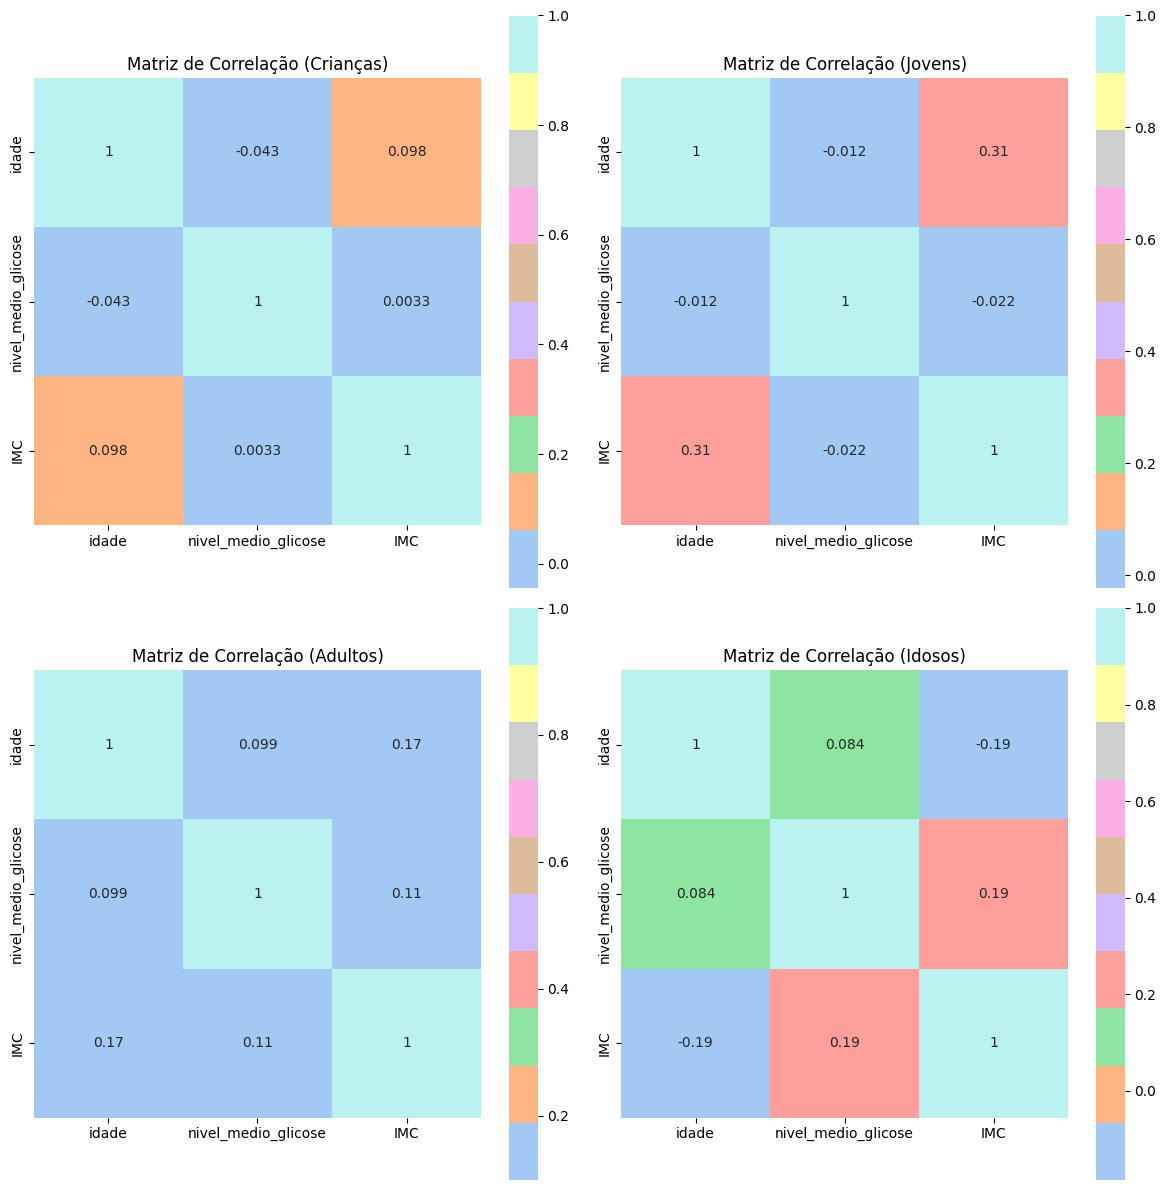

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma paleta de cores com tons pastel
paleta_cores = sns.color_palette("pastel")

# Criar uma figura com um layout de subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Gráfico 1: Crianças
axs[0, 0].set_title('Matriz de Correlação (Crianças)')
sns.heatmap(criancas[['idade', 'nivel_medio_glicose', 'IMC']].corr(), annot=True, cmap=paleta_cores, ax=axs[0, 0])
axs[0, 0].set_aspect('equal')

# Gráfico 2: Jovens
axs[0, 1].set_title('Matriz de Correlação (Jovens)')
sns.heatmap(jovens[['idade', 'nivel_medio_glicose', 'IMC']].corr(), annot=True, cmap=paleta_cores, ax=axs[0, 1])
axs[0, 1].set_aspect('equal')

# Gráfico 3: Adultos
axs[1, 0].set_title('Matriz de Correlação (Adultos)')
sns.heatmap(adultos[['idade', 'nivel_medio_glicose', 'IMC']].corr(), annot=True, cmap=paleta_cores, ax=axs[1, 0])
axs[1, 0].set_aspect('equal')

# Gráfico 4: Idosos
axs[1, 1].set_title('Matriz de Correlação (Idosos)')
sns.heatmap(idosos[['idade', 'nivel_medio_glicose', 'IMC']].corr(), annot=True, cmap=paleta_cores, ax=axs[1, 1])
axs[1, 1].set_aspect('equal')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o quadro com os gráficos
plt.show()


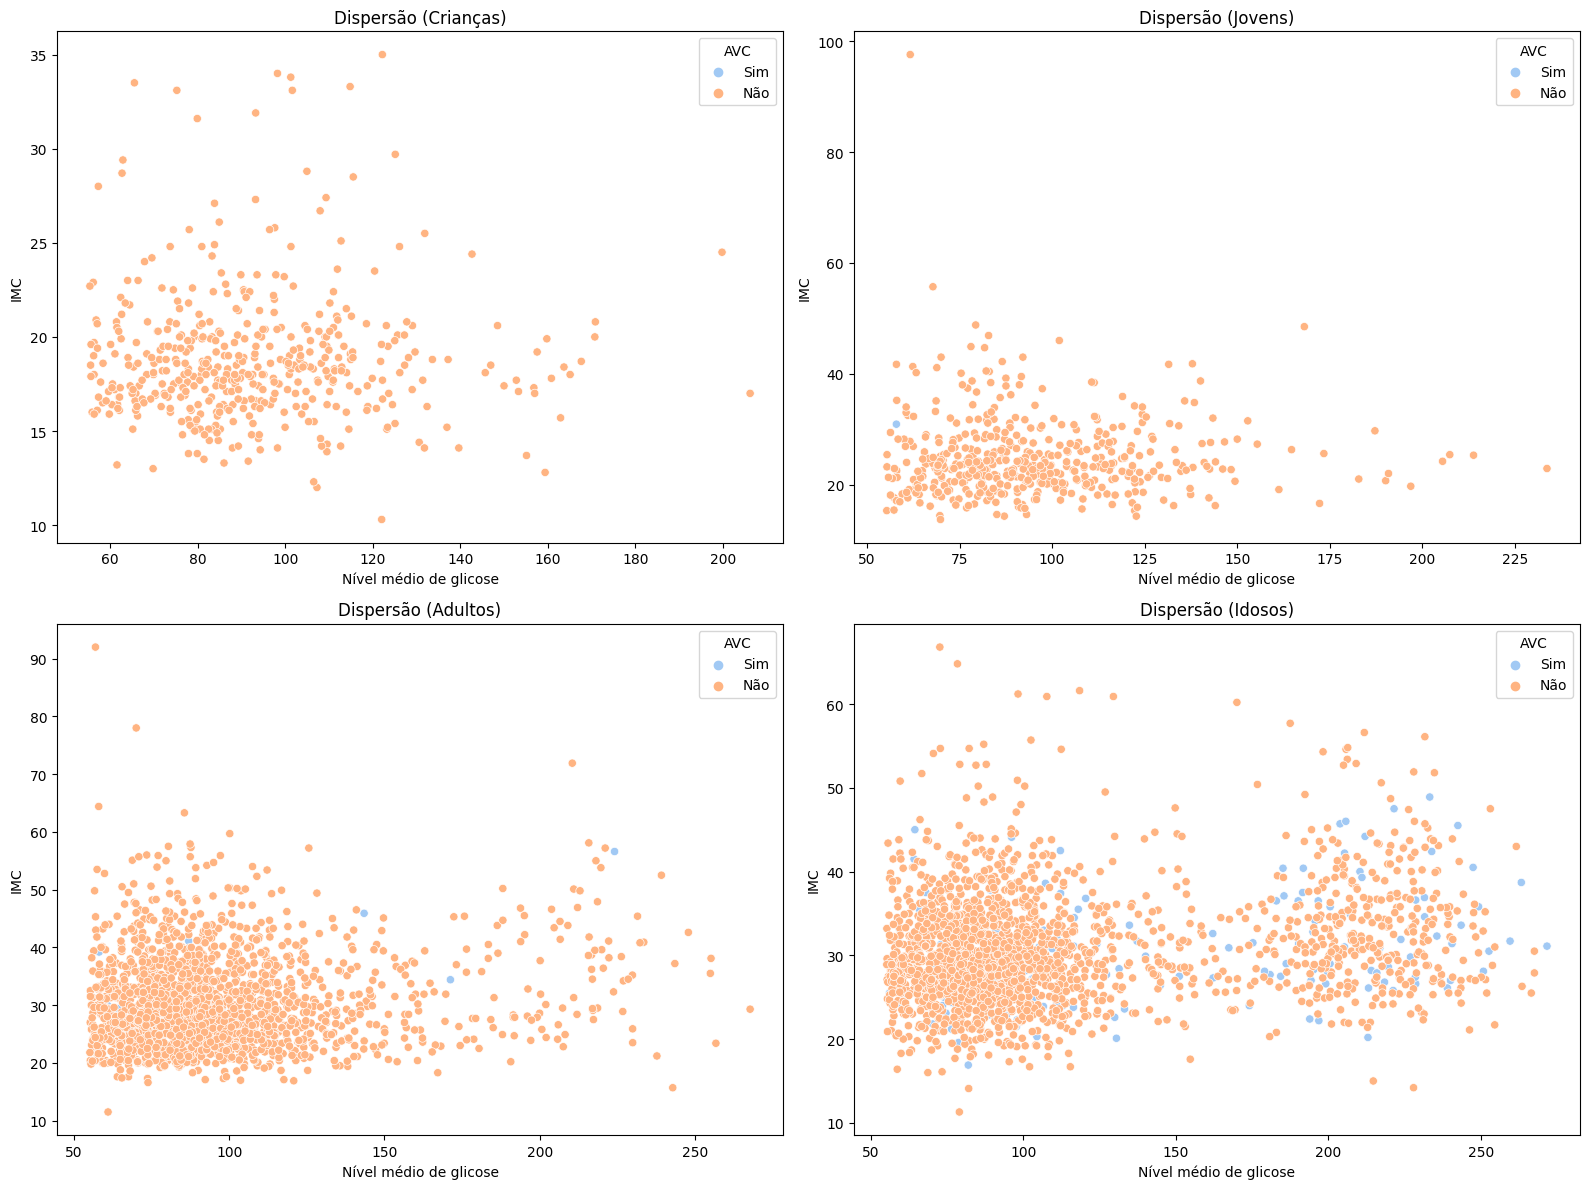

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um quadro com os gráficos de dispersão
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Crianças
axs[0, 0].set_title('Dispersão (Crianças)')
sns.scatterplot(data=criancas, x='nivel_medio_glicose', y='IMC', hue='AVC', palette='pastel', ax=axs[0, 0])
axs[0, 0].set_xlabel('Nível médio de glicose')

# Gráfico 2: Jovens
axs[0, 1].set_title('Dispersão (Jovens)')
sns.scatterplot(data=jovens, x='nivel_medio_glicose', y='IMC', hue='AVC', palette='pastel', ax=axs[0, 1])
axs[0, 1].set_xlabel('Nível médio de glicose')

# Gráfico 3: Adultos
axs[1, 0].set_title('Dispersão (Adultos)')
sns.scatterplot(data=adultos, x='nivel_medio_glicose', y='IMC', hue='AVC', palette='pastel', ax=axs[1, 0])
axs[1, 0].set_xlabel('Nível médio de glicose')

# Gráfico 4: Idosos
axs[1, 1].set_title('Dispersão (Idosos)')
sns.scatterplot(data=idosos, x='nivel_medio_glicose', y='IMC', hue='AVC', palette='pastel', ax=axs[1, 1])
axs[1, 1].set_xlabel('Nível médio de glicose')

plt.tight_layout()
plt.show()


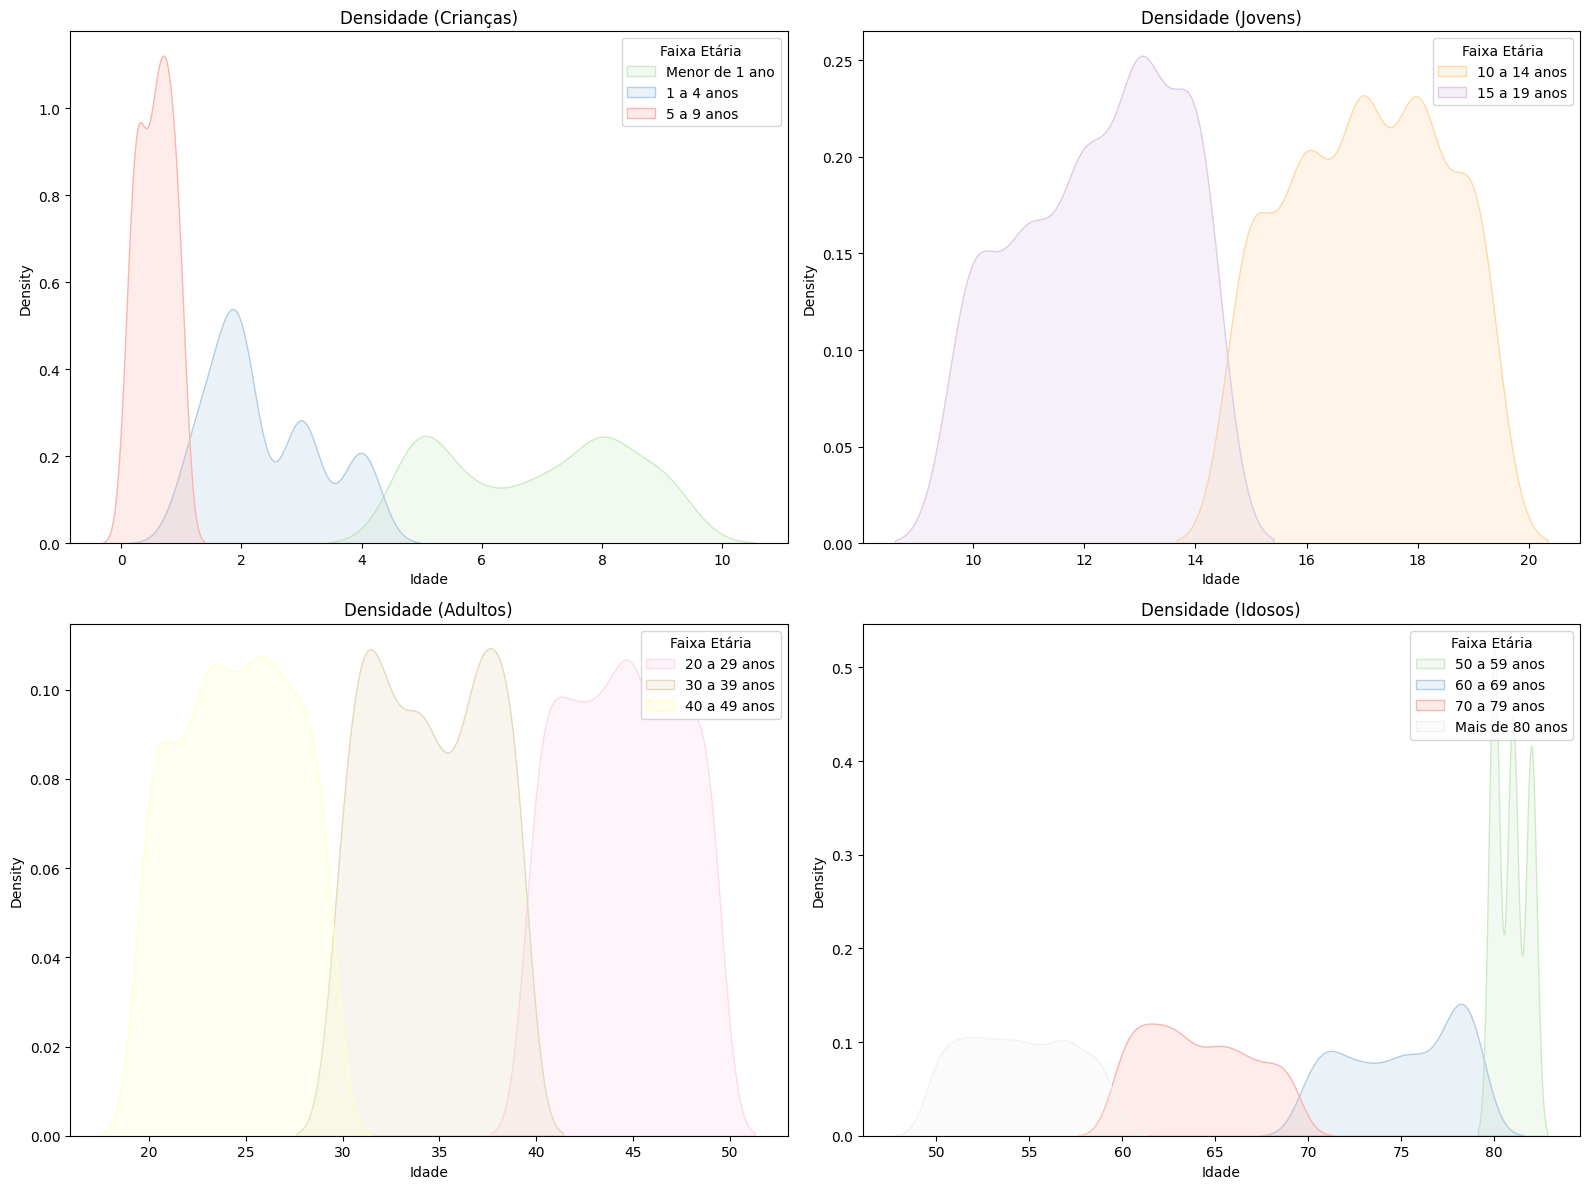

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


# Criar um quadro com os gráficos de densidade
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Crianças
axs[0, 0].set_title('Densidade (Crianças)')
sns.kdeplot(data=criancas, x='idade', hue='faixa_etaria', fill=True, common_norm=False, palette='Pastel1', ax=axs[0, 0])
axs[0, 0].set_xlabel('Idade')
axs[0, 0].legend(title='Faixa Etária', labels=['Menor de 1 ano', '1 a 4 anos', '5 a 9 anos'])

# Gráfico 2: Jovens
axs[0, 1].set_title('Densidade (Jovens)')
sns.kdeplot(data=jovens, x='idade', hue='faixa_etaria', fill=True, common_norm=False, palette='Pastel1', ax=axs[0, 1])
axs[0, 1].set_xlabel('Idade')
axs[0, 1].legend(title='Faixa Etária', labels=['10 a 14 anos', '15 a 19 anos'])

# Gráfico 3: Adultos
axs[1, 0].set_title('Densidade (Adultos)')
sns.kdeplot(data=adultos, x='idade', hue='faixa_etaria', fill=True, common_norm=False, palette='Pastel1', ax=axs[1, 0])
axs[1, 0].set_xlabel('Idade')
axs[1, 0].legend(title='Faixa Etária', labels=['20 a 29 anos', '30 a 39 anos', '40 a 49 anos'])

# Gráfico 4: Idosos
axs[1, 1].set_title('Densidade (Idosos)')
sns.kdeplot(data=idosos, x='idade', hue='faixa_etaria', fill=True, common_norm=False, palette='Pastel1', ax=axs[1, 1])
axs[1, 1].set_xlabel('Idade')
axs[1, 1].legend(title='Faixa Etária', labels=['50 a 59 anos', '60 a 69 anos', '70 a 79 anos', 'Mais de 80 anos'])

plt.tight_layout()
plt.show()


In [52]:
# Gráfico de barras para explorar a presença de AVC por faixa etária
pafec = px.histogram(criancas, x='faixa_etaria', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'faixa_etaria':'Faixa Etária', 'AVC':'Presença de AVC'})
pafec.update_layout(title='Presença de AVC por Faixa Etária em crianças')
pafec.show()

# Gráfico de barras para explorar a presença de AVC por faixa etária
pafej = px.histogram(jovens, x='faixa_etaria', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'faixa_etaria':'Faixa Etária', 'AVC':'Presença de AVC'})
pafej.update_layout(title='Presença de AVC por faixa etária em jovens')
pafej.show()

# Gráfico de barras para explorar a presença de AVC por faixa etária
pafea = px.histogram(adultos, x='faixa_etaria', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'faixa_etaria':'Faixa Etária', 'AVC':'Presença de AVC'})
pafea.update_layout(title='AVC por faixa etária em adultos')
pafea.show()

# Gráfico de barras para explorar a presença de AVC por faixa etária
pafei = px.histogram(idosos, x='faixa_etaria', color='AVC', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel, labels={'faixa_etaria':'Faixa Etária', 'AVC':'Presença de AVC'})
pafei.update_layout(title='AVC por faixa etária em idosos')
pafei.show()

In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Cria o subquadro com 4 linhas e 1 coluna
fig = make_subplots(rows=4, cols=1)


# Gráfico de barras para crianças
fig.add_trace(go.Bar(x=criancas['faixa_etaria'], y=criancas['AVC'], name='Crianças', marker_color='rgb(197, 207, 232)'), row=1, col=1)

# Gráfico de barras para jovens
fig.add_trace(go.Bar(x=jovens['faixa_etaria'], y=jovens['AVC'], name='Jovens', marker_color='rgb(222, 184, 135)'), row=2, col=1)

# Gráfico de barras para adultos
fig.add_trace(go.Bar(x=adultos['faixa_etaria'], y=adultos['AVC'], name='Adultos', marker_color='rgb(152, 223, 138)'), row=3, col=1)

# Gráfico de barras para idosos
fig.add_trace(go.Bar(x=idosos['faixa_etaria'], y=idosos['AVC'], name='Idosos', marker_color='rgb(255, 190, 197)'), row=4, col=1)

# Atualiza o layout do quadro
fig.update_layout(
    title='Presença de AVC por faixa etária',
    height=1000,
    width=800,
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    plot_bgcolor='white'
)

# Define a cor do eixo y
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Mostra o quadro com os gráficos
fig.show()

### O modelo de Regressão Logística foi treinado usando o conjunto de dados fornecido.
### O objetivo é prever se uma pessoa terá um derrame ou não, com base em características como idade, sexo, pressão arterial, nível de glicose, entre outras.

In [56]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Pré-processamento dos dados
dados_avc['faixa_etaria'] = dados_avc['faixa_etaria'].astype('category').cat.codes
dados_avc['glicose_intervalos'] = dados_avc['glicose_intervalos'].astype('category').cat.codes

# Transformando sim e não de AVC para 1 e 0 respectivamente
# 0 representa 'Não' e 1 representa 'Sim'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(dados_avc['AVC']) # Ajustar e transformar os rótulos da variável AVC
dados_avc['AVC'] = y_encoded # Substitua a coluna 'AVC' pelos rótulos codificados

# Separar variáveis de entrada (X) e variável de destino (y)
X = dados_avc.drop(['AVC'], axis=1)
y = dados_avc['AVC']

# Lidar com valores ausentes (se houver) e codificar variáveis categóricas
X = X.fillna(X.mean())
X = pd.get_dummies(X)

# Aplicar oversampling na classe minoritária
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalização/escalonamento de variáveis numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir o modelo
model = LogisticRegression()

# Treinar o modelo
model.fit(X_train_scaled, y_train)

# Realizar previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir as métricas de desempenho
print("\nAcurácia:", accuracy)
print("\nPrecisão:", precision)
print("\nRecall:", recall)
print("F1-score:", f1)

# Calcular e exibir a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(confusion)



Acurácia: 0.7994858611825193

Precisão: 0.7685185185185185

Recall: 0.8556701030927835
F1-score: 0.8097560975609756

Matriz de Confusão:
[[725 250]
 [140 830]]


<ipython-input-56-5bd3783e3767>:23: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



# Conclusões
* A maioria dos pacientes são mulheres;

* A maioria não tem hipertensão;

* A maioria não tem doença cardíaca;

* A maioria são casados;

* A maioria mora em zona urbana (mínima diferença para zona rural);

* A maioria não teve AVC;

* A média de idades é mais ou menos 42-43 anos;

* A maioria nunca fumou, 30,2% são informações desconhecidas (“desconhecido”), pois são crianças e 32,7% já fumaram ou fumam;

* A maioria dos pacientes trabalham em empresas privadas;

* A mediana de idade é 44 anos, 82 é a idade máxima e a idade mínima é 0,08 anos (bebês);

* A mediana de IMC é 28,1 (sobrepeso), o mínimo é 10,3 (magreza) e o máximo é 97,6 (obesidade grau III);

* A mediana do nível médio de glicose é 91,68 (normal), o máximo é 271,74 (diabetes) e o mínimo é 55,12 (hipoglicemia);

* 578 pacientes possuem pelo menos uma doença, seja ela hipertensão ou doença cardíaca. 58 pacientes possuem as duas e 4.272 pacientes não possuem nenhuma;

* 1.478 pacientes que fumam ou já fumaram antes, não tiveram AVC, outros 96 tiveram;

* 1.382 pacientes que fumam ou já fumaram antes, não possuem hipertensão, outros 192 possuem;

* A maioria dos pacientes que fumam ou já fumaram antes tem o nível de glicose entre 70 e 99,99 (normal);

* 532 pacientes com idades entre 50 e 79 anos, possuem nível de glicose igual ou acima de 125, ou seja, são diabéticos. Porém, uma boa parte dos pacientes (cor laranja), possuem glicose no nível normal, adequado: entre 70 e 100;

* 165 pacientes, com idades entre 50 e 79 anos, já tiveram AVC;

* Sobre a relação entre IMC e nível de glicose, a maioria dos pacientes possuem glicose normal, porém, há alguns com nível de glicose muito alto e IMC também (cores laranja e amarelo), ou seja, essas pessoas possuem diabetes e obesidade.